#  **Brain Tumor Segmentation using Deep Learning Framework (VNET)**




## **About The Project**

This project presents the use of deep learning and image processing techniques for the segmentation of tumors into different region

## **About Dataset**



*Data released with multimodal brain tumor segmentation challenge by Medical Image Computing and Computer Assisted Intervention (MICCAI) is used for training.

*3D dataset consists of pre surgical MRI scans of 210 High-Grade Glioma (HGG) patients and 75 Low-Grade Glioma (LGG).


*The dataset has 4 modalities- T1-weighted (T1w), post-contrast T1-weighted (T1ce), T2-weighted (T2), Fluid Attenuated Inversion Recovery (FLAIR).


*Ground truth (seg) is taken as the target output

*These images are manually segmented by expert neuroradiologist labelled as as enhancing tumor (label 4), peritumoral edema (label 2), and the core (label 1)



*Presence of Multiple tumor region is more visible with HGG than LGG- thus only HGGs are used for training.


*The HGG consists of 210 patients data. The deep learning models were trained in the batches of 50 patients due to limitations of Google Colaboratory.








## **Pre-Processing**

*Each 3D volume of 4 has a size of 240×240×155 for all modalities and ground truth.

*After slicing we will get 155 2D images of size 240×240 size.

*Only 90 slices (slice no 30 to slice no 120) from each volume are selected.

*These slices cropped to 192×192 (Background noise)
18,900 2D images of each MRI modality. (210 HGG data × 90 slices = 18900)

*Total images for all modalities will become 75,600. (210 HGG patient's data × 90 slices of each modality × 4 modalities = 75,600 2D images)

*


## **Feature Engineering**

Feature engineering involves transforming raw data into a format that is suitable for modeling



*One Hot Encoding: The ground truth labels are typically categorical, representing different tissue types (e.g., tumor core, edema, non-enhancing tumor core, background). One-hot encoding converts these categorical labels into binary vectors where each element corresponds to a class label, and only one element is 1 (indicating the presence of that class) while the rest are 0



*Normalization:Normalization is often applied to standardize the intensity values across different images or imaging modalities. This is important because the intensity range can vary between scans and modalities, and normalizing the data helps ensure that the model learns meaningful patterns rather than being biased by differences in intensity.


Normalization approach used here is to subtract the mean and divide by the maximum intensity value. This centers the data around zero and scales it to a range between -1 and 1.




**Future Approach (Restricted by Memory issue)**

Data augmentation is indeed a powerful technique in feature engineering, particularly in computer vision tasks like medical image analysis.but is computationally expensive and memory-intensive, especially when dealing with large datasets or high-resolution images. restricted that approach.




## **Train-Test Split**

*Selecting specific slices[:,30:120,30:222,30:222,:] from each sample and reshaping the data accordingly, you're able to obtain 1620 samples with a shape of 192x192x4 for training from the original 30 samples with four channels.


*Data split into 3:1:1- 60% images for training, 20% images for testing, and 20% for validation. All the models are trained with batch size-8 and no of epochs-30.




##**Model-2D VNET Architecture**

*While Preprocesing 3D images are preprocessed to 2D slices and there by we are using 2D convolution layers and thereby reduce educes computational complexity and memory requirements and high  chances to lead to overfitting(more parameters in 3D), especially when the training dataset is limited.

# **Components**

Convolutional Block (conv_block): Used in both the encoder and decoder.

Up-Convolutional Block (up_conv_block): Used in the decoder.


Skip Connections: Used to connect encoder blocks to decoder blocks.


# **Parametric Rectified Linear Unit (PReLU)**

*PReLU helps alleviate the issue of dying ReLU neurons, where neurons become inactive (i.e., output zero) for negative inputs during training. By allowing a small negative gradient for negative inputs and allowing for more flexibility in modeling complex relationships in the data.

# **Batch Normalisation**

*During training, batch normalization calculates the mean and variance of each feature within the mini-batch.

*These statistics are then used to normalize the activations.

*It ensures that the activations within each layer stay within a stable range, making it easier for the network to learn.

*Thus,for each feature (neuron), we subtract the mean and divide by the standard deviation across a mini-batch of data.

*Acts a regularisastion technique.

# **Dice Coeffcient**

* Measures the overlap between the predicted zone and the ground truth as a proportion, so the size of the class is taken into account.*


*Consider spatial overlap and prioritize it over pixel-wise discrepancies to enhance spatial learning effectiveness.


*By considering the intersection of the two segmentation sets relative to their total sizes, the Dice coefficient provides a concise measure ranging from 0 to 1, where 1 indicates perfect spatial overlap and 0 indicates no overlap. This metric is especially valuable in analyzing complex spatial relationships, where objects may vary in size, shape, and orientation, as it focuses on overall spatial agreement rather than pixel-wise differences


*Models trained with no of epochs-30.










# **Model Evaluation**

*The training and validation loss, as well as the dice coefficient, were plotted against the number of iterations. This technique visually represents the trend of these metrics over the course of training, offering insights into the model's performance and convergence

*A table was generated to summarize the results for the training, validation, and testing datasets. This table included metrics such as loss, dice coefficient, and accuracy for each dataset, providing a concise comparison of the model's performance across different evaluation stages.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:

!pip install SimpleITK

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 16.5 MB/s eta 0:00:00


**Import Packages**

In [ ]:
import SimpleITK as sitk
from tqdm import tqdm
import numpy as np
import os

from keras.utils import to_categorical, normalize

from keras.models import Model
from keras.layers import MaxPooling2D,add,Input,Dropout,Conv2D,Dense,BatchNormalization,Concatenate,Input,Dropout,Maximum,Activation,Dense,Flatten,UpSampling2D,Conv2DTranspose,Add,Multiply,Lambda,PReLU,concatenate
from keras.optimizers import SGD,Adam,RMSprop,Nadam
import keras.callbacks as callbacks
import keras.initializers as initializers
from keras.callbacks import Callback, ModelCheckpoint, LearningRateScheduler
from keras import regularizers
from keras import backend as K

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import skimage.io as io
import skimage.transform as trans

**# Path to your kaggle.json**

In [ ]:
import json


json_path = "/content/drive/MyDrive/kaggle.json"  # Update this with the path to your kaggle.json file

# Open and load the contents of the JSON file
with open(json_path) as f:
    kaggle_data = json.load(f)

# Extract the Kaggle username and API key
kaggle_username = kaggle_data['username']
kaggle_api_key = kaggle_data['key']

# Set Kaggle API credentials as environment variables
import os
os.environ['KAGGLE_USERNAME'] = kaggle_username
os.environ['KAGGLE_KEY'] = kaggle_api_key

In [ ]:
! kaggle datasets download -d aryashah2k/brain-tumor-segmentation-brats-2019

Dataset URL: https://www.kaggle.com/datasets/aryashah2k/brain-tumor-segmentation-brats-2019
License(s): CC0-1.0
100% 2.59G/2.60G [01:15<00:00, 44.2MB/s]
100% 2.60G/2.60G [01:15<00:00, 36.9MB/s]


In [ ]:
!unzip -l /content/brain-tumor-segmentation-brats-2019.zip


Archive:  /content/brain-tumor-segmentation-brats-2019.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
 17856352  2021-03-09 05:19   MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_2013_10_1/BraTS19_2013_10_1_flair.nii
 17858592  2021-03-09 05:21   MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_2013_10_1/BraTS19_2013_10_1_seg.nii
 17856352  2021-03-09 05:21   MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_2013_10_1/BraTS19_2013_10_1_t1.nii
 17856352  2021-03-09 05:21   MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_2013_10_1/BraTS19_2013_10_1_t1ce.nii
 17856352  2021-03-09 05:22   MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_2013_10_1/BraTS19_2013_10_1_t2.nii
 17856352  2021-03-09 05:22   MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_2013_11_1/BraTS19_2013_11_1_flair.nii
 17858592  2021-03-09 05:22   MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_2013_11_1/BraTS19_2013_11_1_seg.nii
 17856352  2021-03-09 05:23   MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_2013_11_1/BraTS19_2013_1

In [ ]:
!unzip /content/brain-tumor-segmentation-brats-2019.zip -d /content/extracted_data/

Archive:  /content/brain-tumor-segmentation-brats-2019.zip
  inflating: /content/extracted_data/MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_2013_10_1/BraTS19_2013_10_1_flair.nii  
  inflating: /content/extracted_data/MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_2013_10_1/BraTS19_2013_10_1_seg.nii  
  inflating: /content/extracted_data/MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_2013_10_1/BraTS19_2013_10_1_t1.nii  
  inflating: /content/extracted_data/MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_2013_10_1/BraTS19_2013_10_1_t1ce.nii  
  inflating: /content/extracted_data/MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_2013_10_1/BraTS19_2013_10_1_t2.nii  
  inflating: /content/extracted_data/MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_2013_11_1/BraTS19_2013_11_1_flair.nii  
  inflating: /content/extracted_data/MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_2013_11_1/BraTS19_2013_11_1_seg.nii  
  inflating: /content/extracted_data/MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_2013_11_1/BraTS19_2013_1

# **# Load data from the specified path, considering only the first 30 directories**

In [ ]:

path = '/content/extracted_data/MICCAI_BraTS_2019_Data_Training/HGG/'

def load_data(path, num_directories=20):
    my_dir = sorted(os.listdir(path))
    data = []
    gt = []
    for p in tqdm(my_dir[:num_directories]):  # Consider only the first 'num_directories'
        data_list = sorted(os.listdir(os.path.join(path, p)))
        img_itk = sitk.ReadImage(os.path.join(path, p, data_list[0]))
        flair = sitk.GetArrayFromImage(img_itk)
        img_itk = sitk.ReadImage(os.path.join(path, p, data_list[1]))
        seg =  sitk.GetArrayFromImage(img_itk)
        img_itk = sitk.ReadImage(os.path.join(path, p, data_list[2]))
        t1 =  sitk.GetArrayFromImage(img_itk)
        img_itk = sitk.ReadImage(os.path.join(path, p, data_list[3]))
        t1ce =  sitk.GetArrayFromImage(img_itk)
        img_itk = sitk.ReadImage(os.path.join(path, p, data_list[4]))
        t2 =  sitk.GetArrayFromImage(img_itk)
        data.append([flair, t1, t1ce, t2])
        gt.append(seg)
    data = np.asarray(data, dtype=np.float32)
    gt = np.asarray(gt, dtype=np.uint8)
    return data, gt


data, gt = load_data(path, num_directories=30)



100%|██████████| 30/30 [00:13<00:00,  2.21it/s]


In [ ]:

data.shape,gt.shape,data.dtype,gt.dtype

((30, 4, 155, 240, 240), (30, 155, 240, 240), dtype('float32'), dtype('uint8'))

# **Plot of Loaded Data**

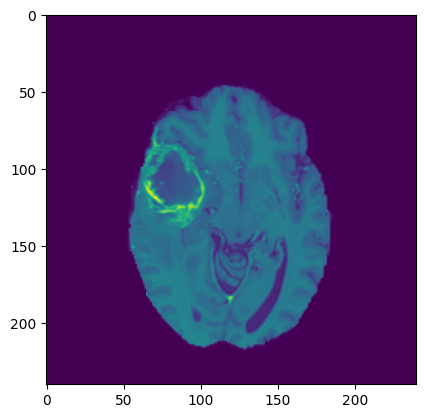

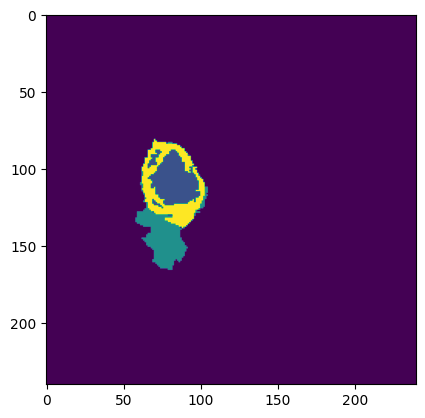

In [ ]:

plt.imshow(data[0,2,65,:,:])
plt.show()
plt.imshow(gt[0,65,:,:])
plt.show()

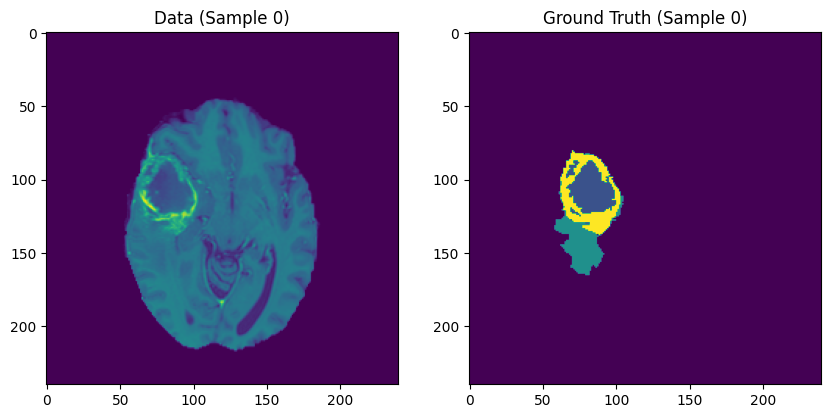

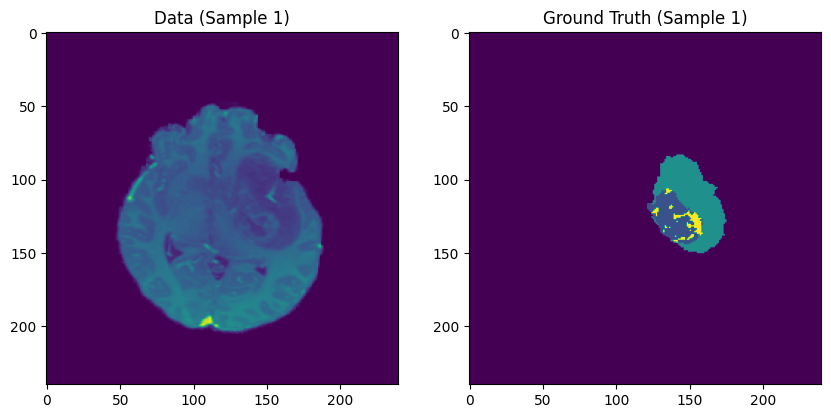

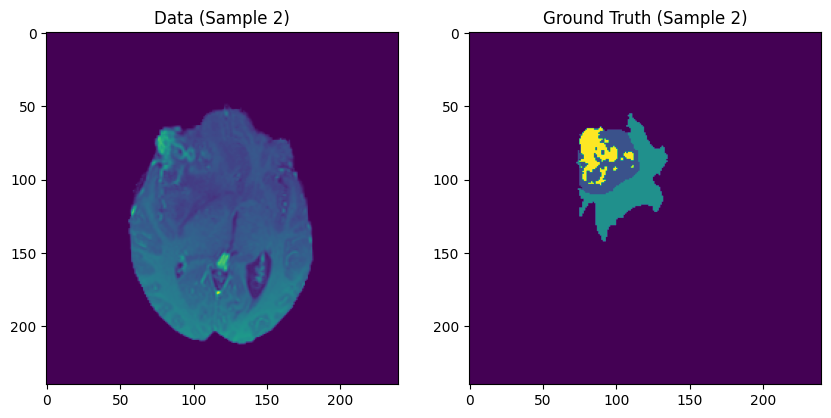

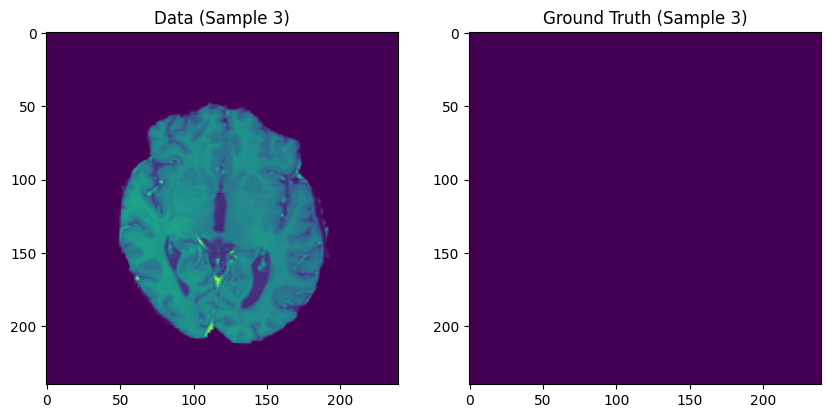

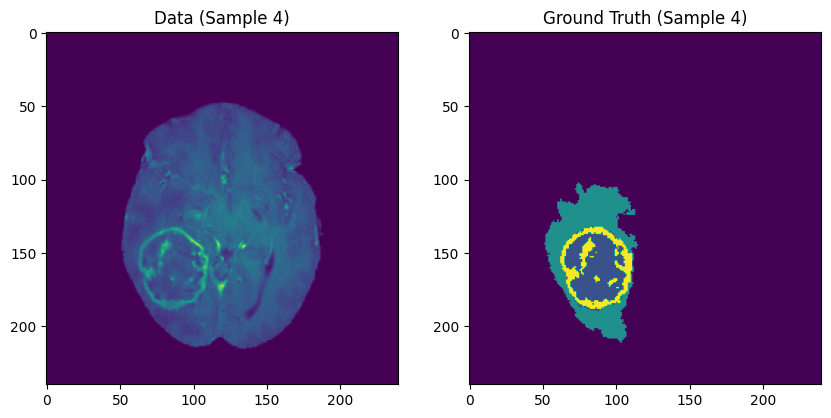

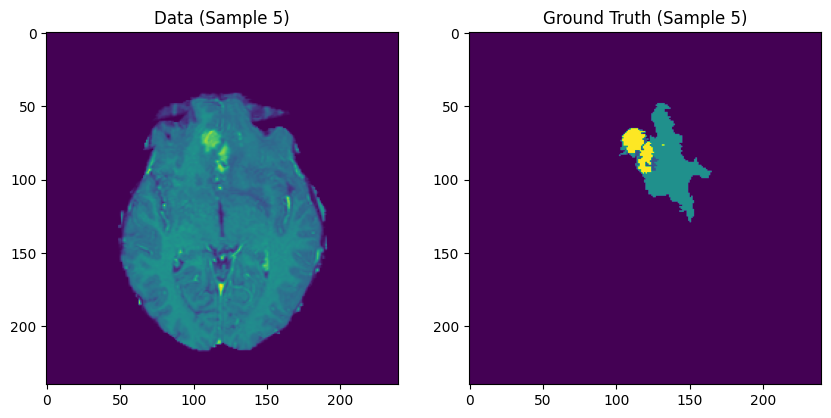

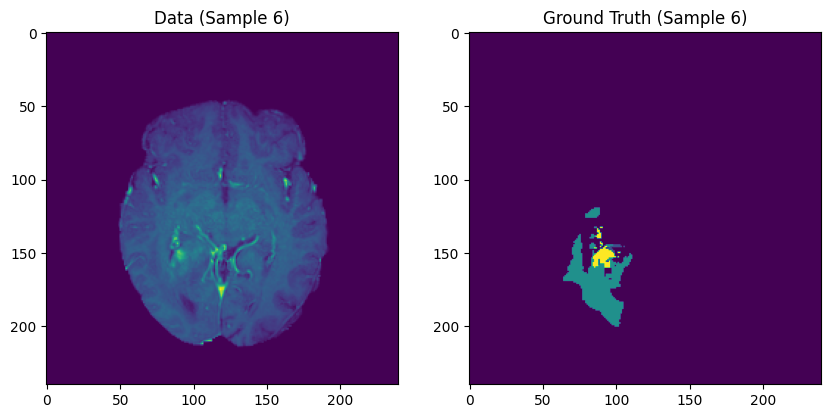

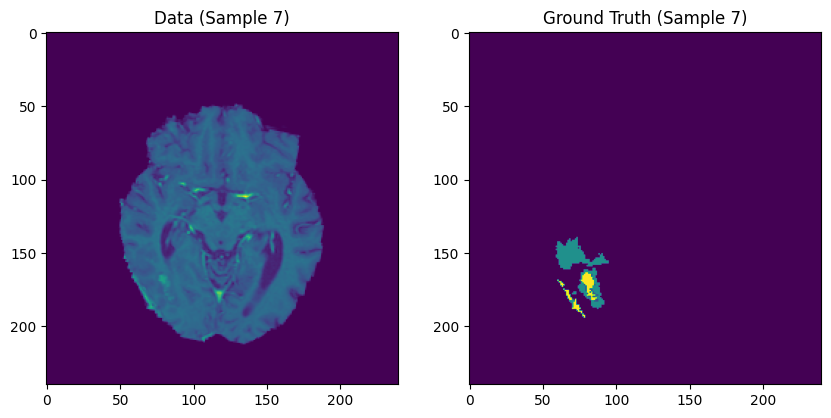

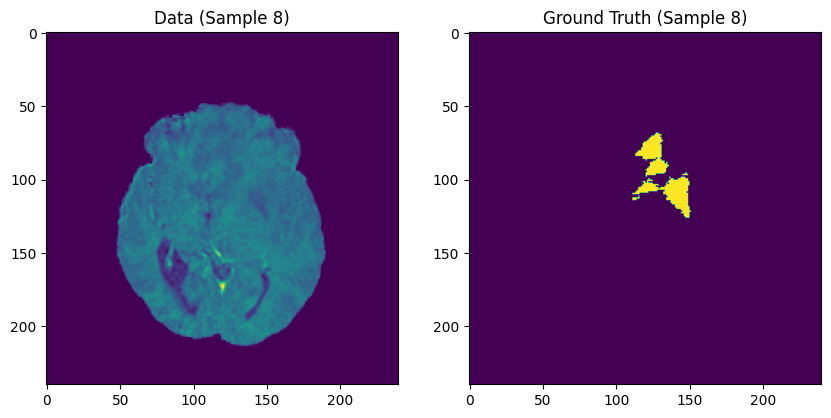

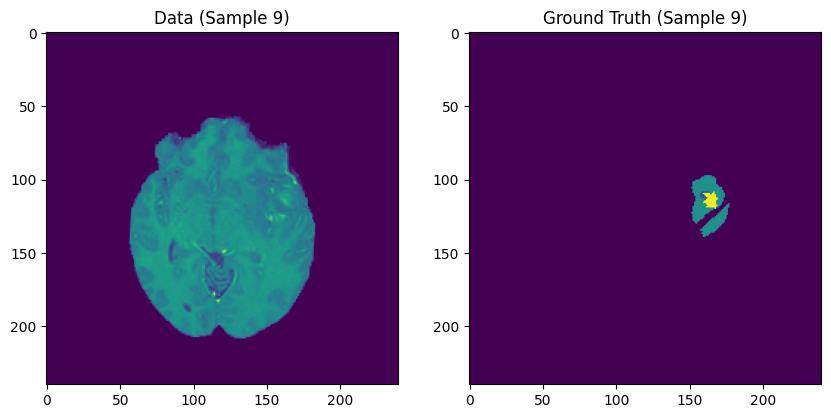

In [ ]:
import matplotlib.pyplot as plt

# Plot the data and ground truth for the first 10 samples
for i in range(10):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Plot data
    axes[0].imshow(data[i, 2, 65, :, :])
    axes[0].set_title('Data (Sample {})'.format(i))

    # Plot ground truth
    axes[1].imshow(gt[i, 65, :, :])
    axes[1].set_title('Ground Truth (Sample {})'.format(i))

    plt.show()


In [ ]:

data = np.transpose(data,(0,2,3,4,1))

In [ ]:

data.shape,gt.shape,data.dtype,gt.dtype

((30, 155, 240, 240, 4), (30, 155, 240, 240), dtype('float32'), dtype('uint8'))

# **Pre-Processing**

In [ ]:

data = data[:,30:120,30:222,30:222,:].reshape([-1,192,192,4])   #taking 30-120 slices
gt = gt[:,30:120,30:222,30:222].reshape([-1,192,192,1])


In [ ]:

data.shape,gt.shape

((2700, 192, 192, 4), (2700, 192, 192, 1))

In [ ]:

gt[np.where(gt==4)]=3   #converting ground truth value of 4 to 3 => one hot encoding


In [ ]:

data.shape,gt.shape

((2700, 192, 192, 4), (2700, 192, 192, 1))

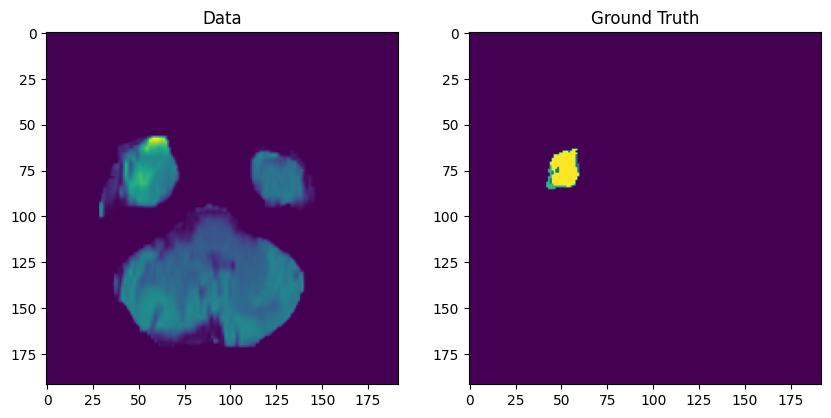

In [ ]:
import matplotlib.pyplot as plt


index =4

# Plot the data
plt.figure(figsize=(10, 5))

# Plot the data slice
plt.subplot(1, 2, 1)
plt.imshow(data[index, :, :,0])
plt.title('Data')

# Plot the ground truth
plt.subplot(1, 2, 2)
plt.imshow(gt[index, :, :, 0])
plt.title('Ground Truth')

plt.show()


# **Train-Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(data, gt, test_size=0.2, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25,random_state=42)

In [ ]:

X_train.shape,Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape

((1620, 192, 192, 4),
 (1620, 192, 192, 1),
 (540, 192, 192, 4),
 (540, 192, 192, 1),
 (540, 192, 192, 4),
 (540, 192, 192, 1))

# **Feature Engineering**

In [ ]:
#one hot encoding
Y_train = to_categorical(Y_train)
Y_val = to_categorical(Y_val)

In [ ]:
Y_train

array([[[[1., 0., 0., 0.],
         [1., 0., 0., 0.],
         [1., 0., 0., 0.],
         ...,
         [1., 0., 0., 0.],
         [1., 0., 0., 0.],
         [1., 0., 0., 0.]],

        [[1., 0., 0., 0.],
         [1., 0., 0., 0.],
         [1., 0., 0., 0.],
         ...,
         [1., 0., 0., 0.],
         [1., 0., 0., 0.],
         [1., 0., 0., 0.]],

        [[1., 0., 0., 0.],
         [1., 0., 0., 0.],
         [1., 0., 0., 0.],
         ...,
         [1., 0., 0., 0.],
         [1., 0., 0., 0.],
         [1., 0., 0., 0.]],

        ...,

        [[1., 0., 0., 0.],
         [1., 0., 0., 0.],
         [1., 0., 0., 0.],
         ...,
         [1., 0., 0., 0.],
         [1., 0., 0., 0.],
         [1., 0., 0., 0.]],

        [[1., 0., 0., 0.],
         [1., 0., 0., 0.],
         [1., 0., 0., 0.],
         ...,
         [1., 0., 0., 0.],
         [1., 0., 0., 0.],
         [1., 0., 0., 0.]],

        [[1., 0., 0., 0.],
         [1., 0., 0., 0.],
         [1., 0., 0., 0.],
         ...,
 

In [ ]:
normalisation(-1to1)

X_train = (X_train-np.mean(X_train))/np.max(X_train)
X_test = (X_test-np.mean(X_test))/np.max(X_test)
X_val = (X_val-np.mean(X_val))/np.max(X_val)

In [ ]:

X_train.shape,Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape

((1620, 192, 192, 4),
 (1620, 192, 192, 4),
 (540, 192, 192, 4),
 (540, 192, 192, 4),
 (540, 192, 192, 4),
 (540, 192, 192, 1))

# **Model Training**

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, BatchNormalization, PReLU, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Nadam

# **Loss Function**

In [ ]:

def dice_coef(y_true, y_pred, epsilon=1e-6):
    intersection = tf.keras.backend.sum(tf.keras.backend.abs(y_true * y_pred), axis=-1)
    return (2. * intersection) / (tf.keras.backend.sum(tf.keras.backend.square(y_true),axis=-1) + tf.keras.backend.sum(tf.keras.backend.square(y_pred),axis=-1) + epsilon)

def dice_coef_loss(y_true, y_pred):
    return 1 - dice_coef(y_true, y_pred)

In [ ]:



def conv_block(inputs, filters, kernel_size=3, strides=1, padding='same'):
    x = Conv2D(filters, kernel_size, strides=strides, padding=padding)(inputs)
    x = BatchNormalization()(x)
    x = PReLU()(x)
    return x

def up_conv_block(inputs, skip, filters, kernel_size=3, strides=2, padding='same'):
    x = Conv2DTranspose(filters, kernel_size, strides=strides, padding=padding)(inputs)
    x = BatchNormalization()(x)
    x = PReLU()(x)
    x = tf.concat([x, skip], axis=-1)
    return x

def vnet(input_shape=(192, 192, 4), num_class=1, stage_num=5):
    inputs = Input(shape=input_shape)
    x = inputs

    skips = []
    for i in range(stage_num):
        filters = 16 * (2 ** i)
        x = conv_block(x, filters)
        skips.append(x)
        if i < stage_num - 1:
            x = conv_block(x, filters, strides=2)

    for i in range(stage_num - 2, -1, -1):
        filters = 16 * (2 ** i)
        x = up_conv_block(x, skips[i], filters)
        x = conv_block(x, filters)

    outputs = Conv2D(num_class, 1, activation='sigmoid', padding='same')(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Nadam(lr=2e-4), loss=dice_coef_loss, metrics=[dice_coef, 'accuracy'])
    return model

input_shape = (192, 192, 4)
model = vnet(input_shape=input_shape, num_class=4, stage_num=5)
model.summary()



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 192, 192, 4)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 192, 192, 16)         592       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 192, 192, 16)         64        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 p_re_lu (PReLU)             (None, 192, 192, 16)         589824    ['batch_normalization[0][0

In [ ]:


checkpointer = callbacks.ModelCheckpoint(filepath = 'vnet-weights.hdf5',save_best_only=True)
training_log = callbacks.TensorBoard(log_dir='./Model_logs')

In [ ]:
history = model.fit(X_train,Y_train,validation_data=(X_val,Y_val),batch_size=8,epochs=30,callbacks=[training_log,checkpointer],shuffle=True)



Epoch 1/30
203/203 [==============================] - ETA: 0s - loss: 0.1475 - dice_coef: 0.8525 - accuracy: 0.9504

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


203/203 [==============================] - 54s 108ms/step - loss: 0.1475 - dice_coef: 0.8525 - accuracy: 0.9504 - val_loss: 0.1501 - val_dice_coef: 0.8499 - val_accuracy: 0.9675
Epoch 2/30
203/203 [==============================] - 17s 83ms/step - loss: 0.0307 - dice_coef: 0.9693 - accuracy: 0.9804 - val_loss: 0.1227 - val_dice_coef: 0.8773 - val_accuracy: 0.8614
Epoch 3/30
203/203 [==============================] - 18s 90ms/step - loss: 0.0167 - dice_coef: 0.9833 - accuracy: 0.9852 - val_loss: 0.0204 - val_dice_coef: 0.9796 - val_accuracy: 0.9781
Epoch 4/30
203/203 [==============================] - 18s 91ms/step - loss: 0.0124 - dice_coef: 0.9876 - accuracy: 0.9878 - val_loss: 0.0120 - val_dice_coef: 0.9880 - val_accuracy: 0.9873
Epoch 5/30
203/203 [==============================] - 17s 85ms/step - loss: 0.0108 - dice_coef: 0.9892 - accuracy: 0.9887 - val_loss: 0.0100 - val_dice_coef: 0.9900 - val_accuracy: 0.9892
Epoch 6/30
203/203 [==============================] - 18s 87ms/step - 

# **Model Evaluation**

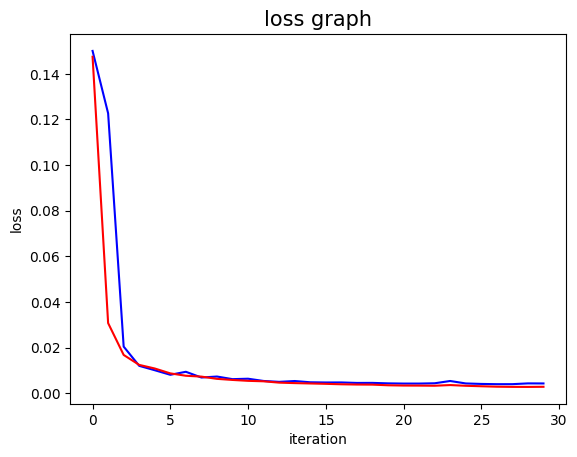

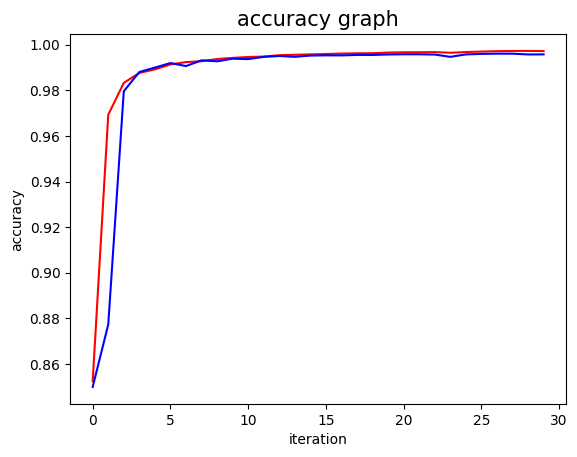

In [ ]:

a = history.history

list_traindice = a['dice_coef']
list_testdice = a['val_dice_coef']

list_trainloss = a['loss']
list_testloss = a['val_loss']

plt.figure(1)
plt.plot(list_testloss, 'b-')
plt.plot(list_trainloss,'r-')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('loss graph', fontsize = 15)
plt.figure(2)
plt.plot(list_traindice, 'r-')
plt.plot(list_testdice, 'b-')
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.title('accuracy graph', fontsize = 15)
plt.show()

# **Model Evaluation-Predicted Output**

In [ ]:
import numpy as np
Y_pre = np.argmax(model.predict(X_test),axis=-1)

17/17 [==============================] - 7s 216ms/step


In [ ]:
np.unique(Y_pre)

array([0, 1, 2, 3])

In [ ]:
Y_pre.shape

(540, 192, 192)

In [ ]:
Y_pre=Y_pre.reshape(-1,192,192,1)

In [ ]:
Y_test.shape,X_test.shape

((540, 192, 192, 1), (540, 192, 192, 4))

X_test 0


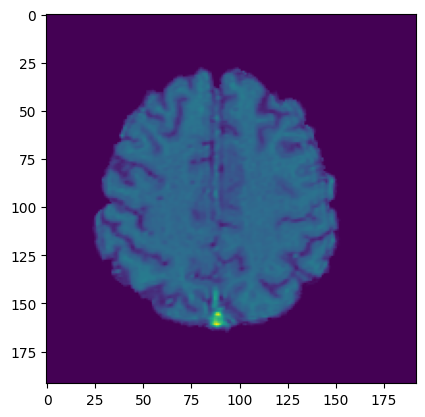

Predicted 0


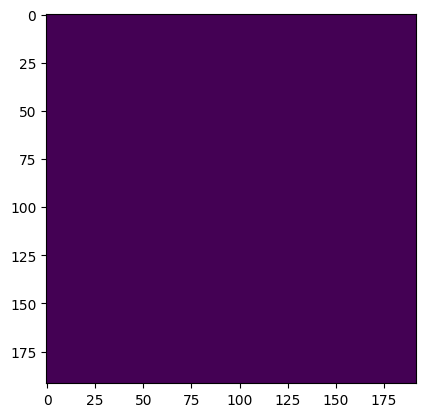

Actual 0


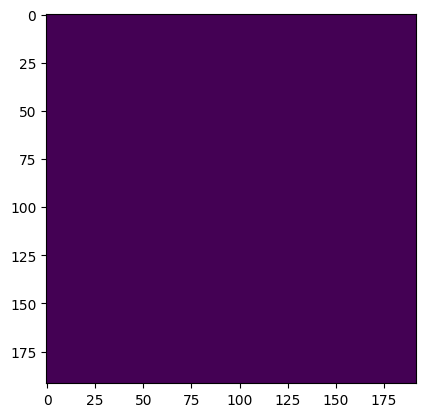

X_test 1


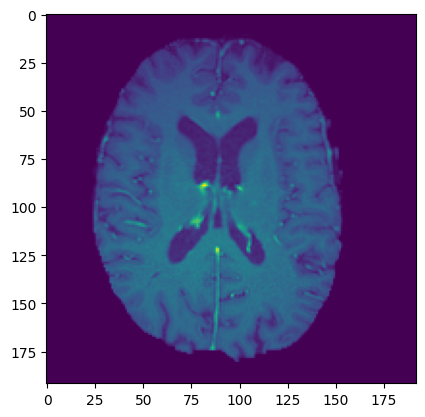

Predicted 1


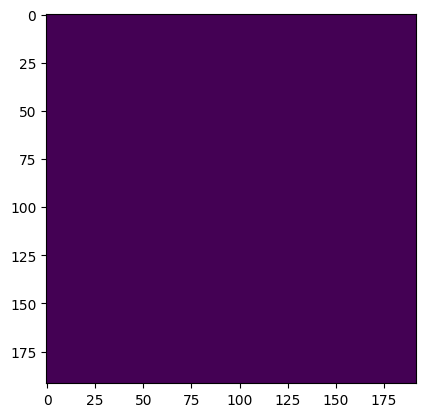

Actual 1


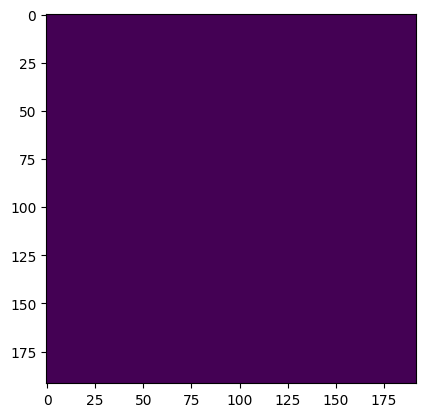

X_test 2


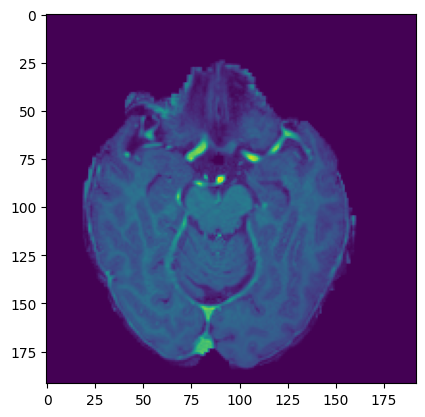

Predicted 2


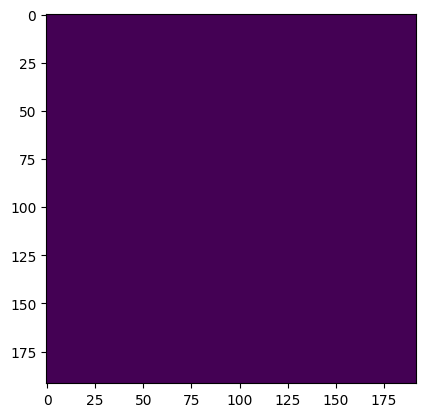

Actual 2


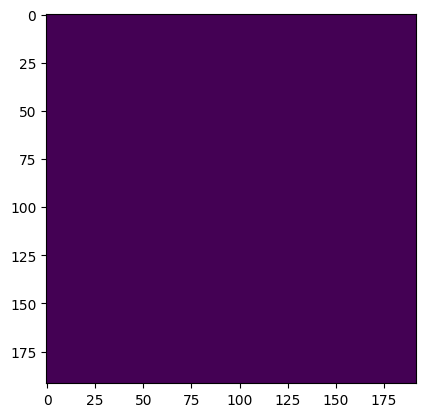

X_test 3


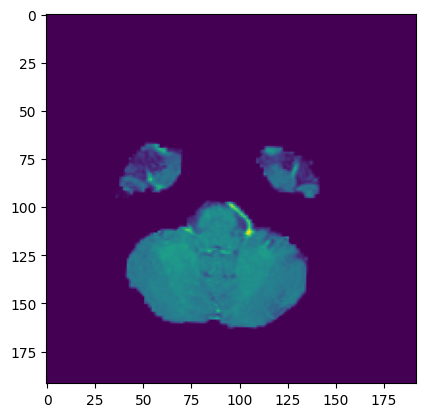

Predicted 3


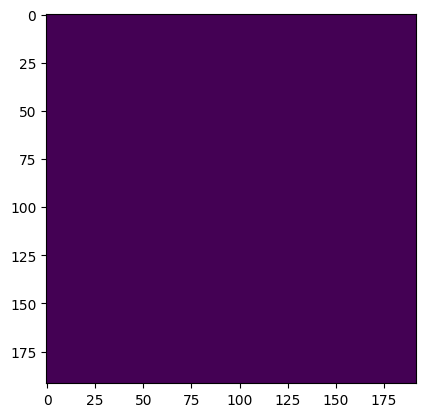

Actual 3


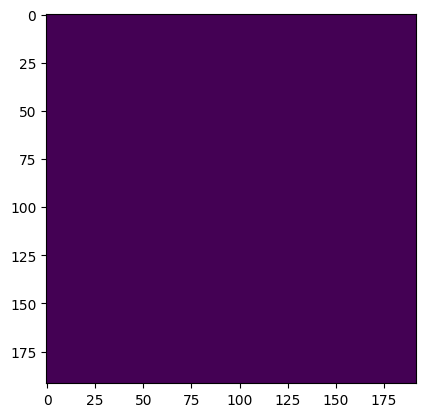

X_test 4


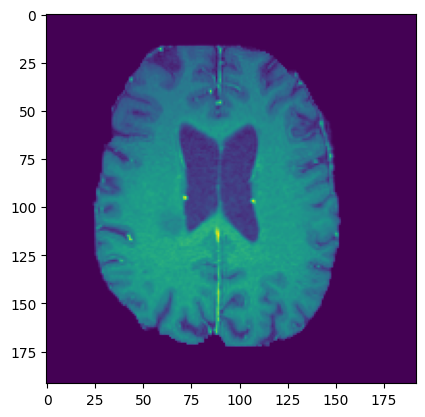

Predicted 4


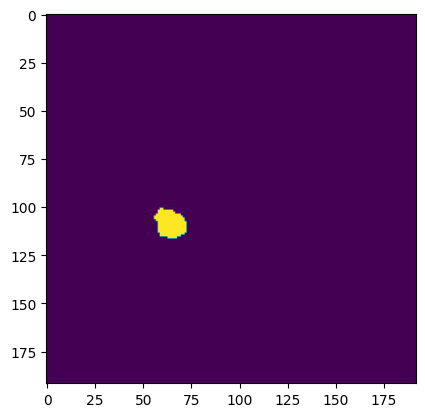

Actual 4


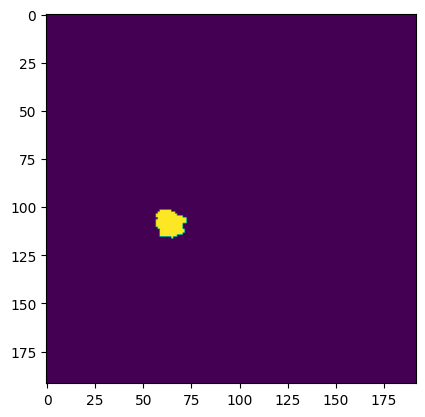

X_test 5


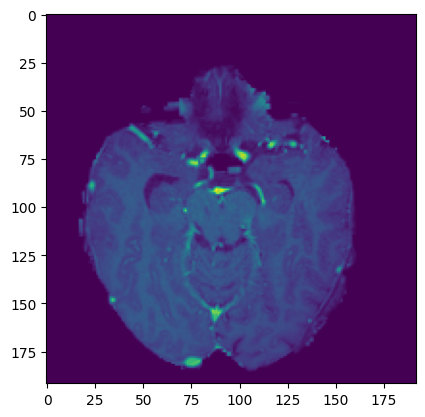

Predicted 5


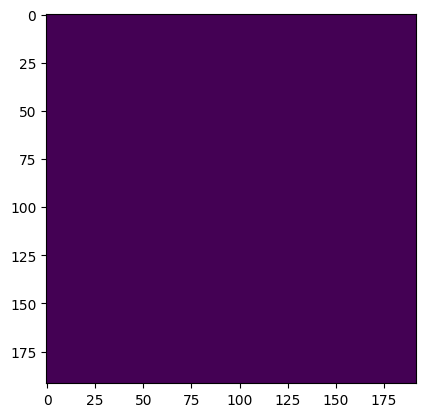

Actual 5


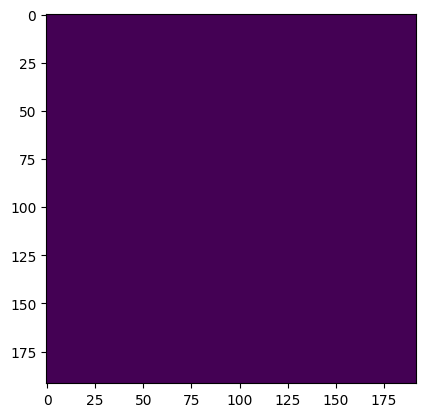

X_test 6


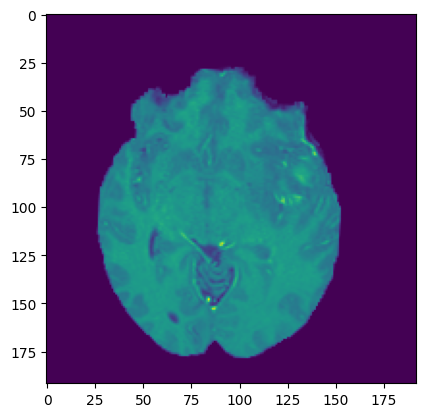

Predicted 6


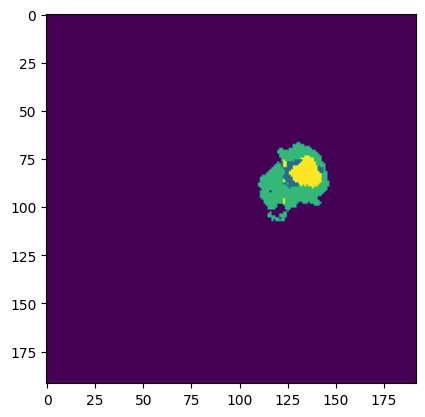

Actual 6


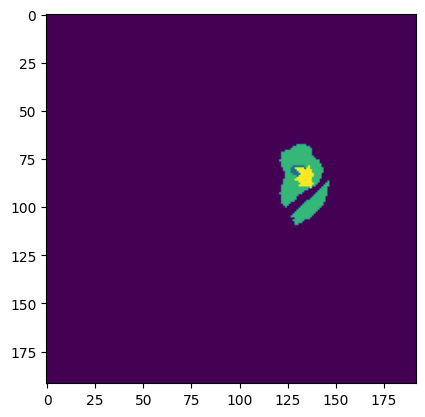

X_test 7


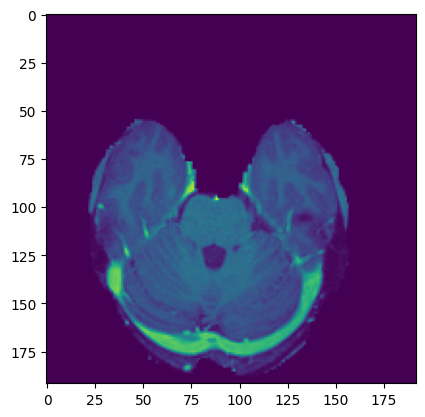

Predicted 7


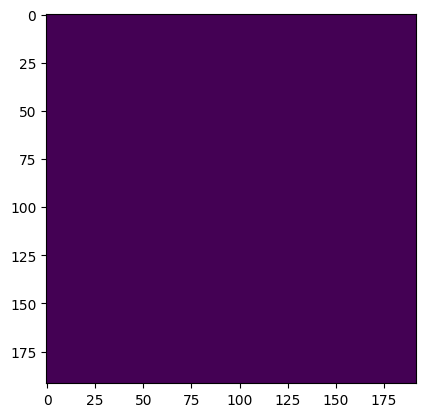

Actual 7


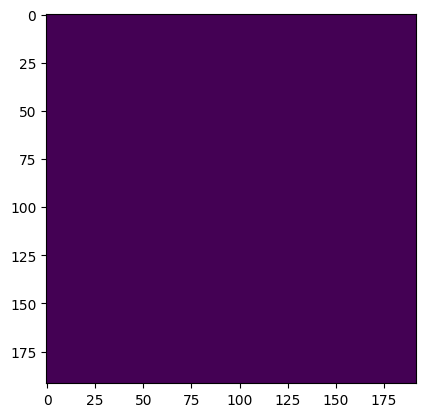

X_test 8


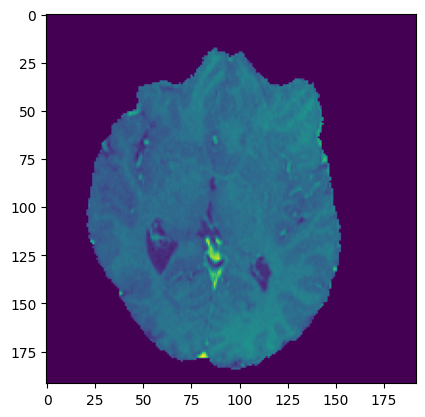

Predicted 8


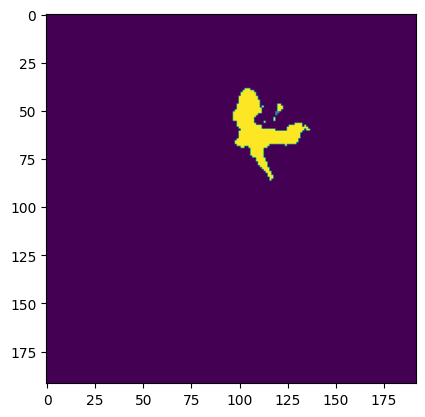

Actual 8


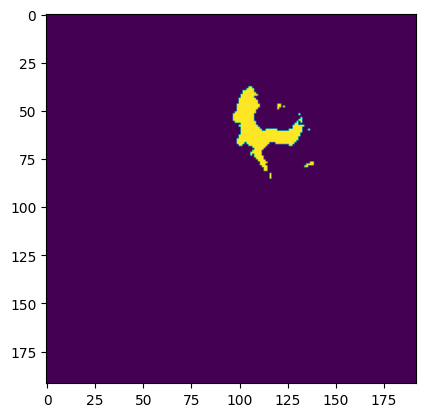

X_test 9


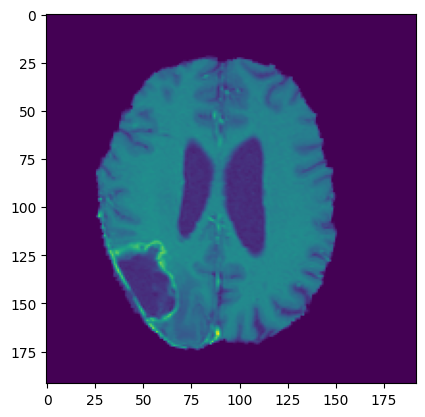

Predicted 9


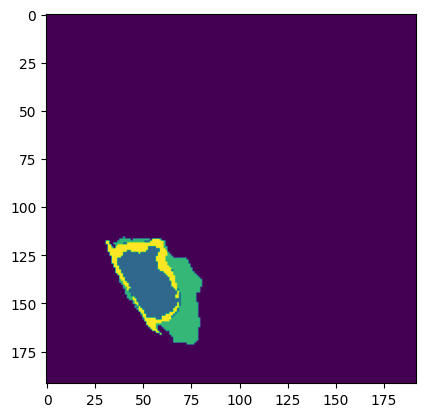

Actual 9


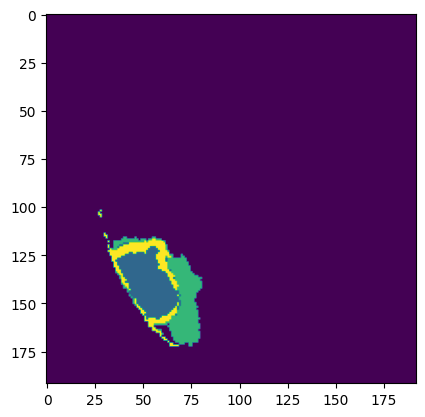

X_test 10


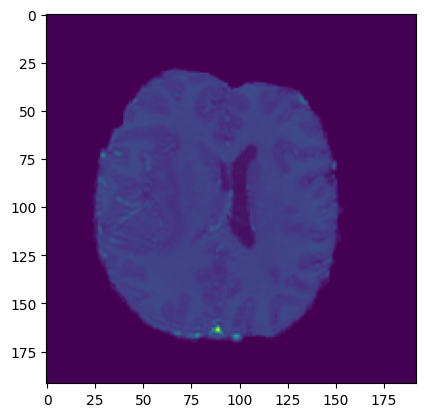

Predicted 10


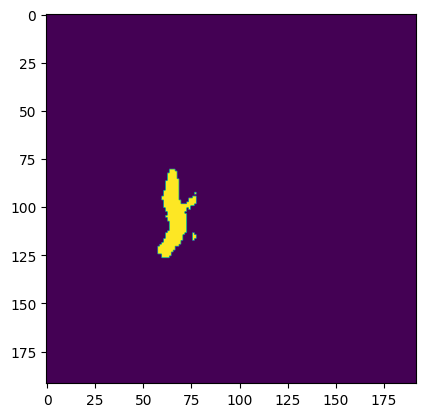

Actual 10


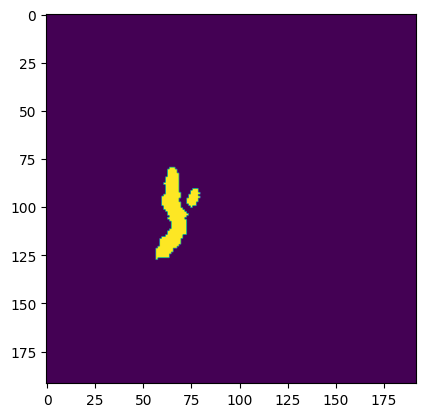

X_test 11


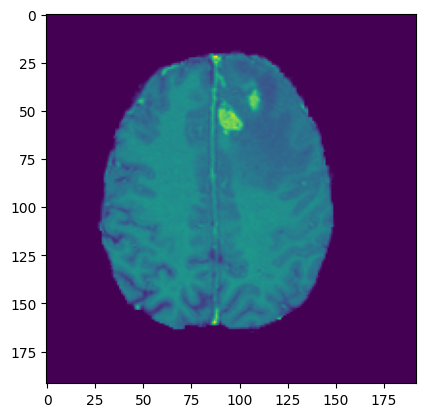

Predicted 11


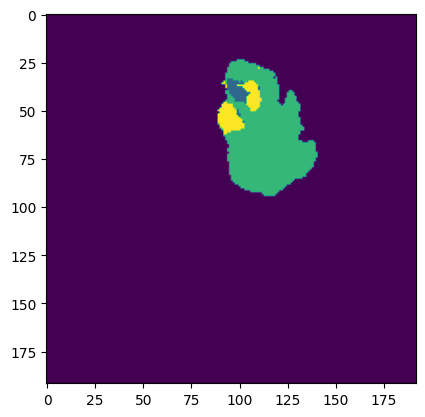

Actual 11


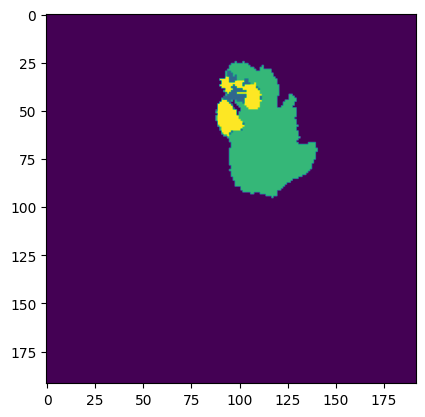

X_test 12


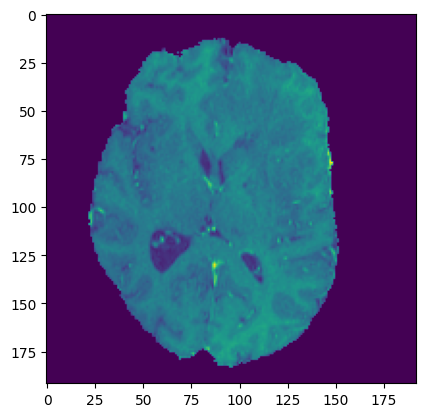

Predicted 12


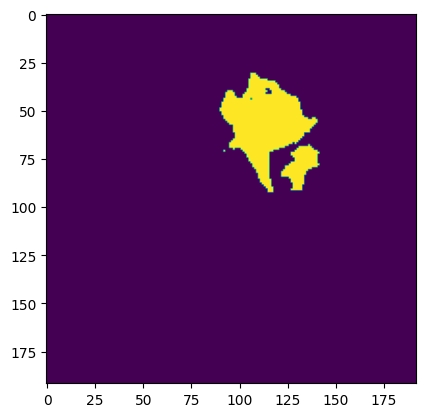

Actual 12


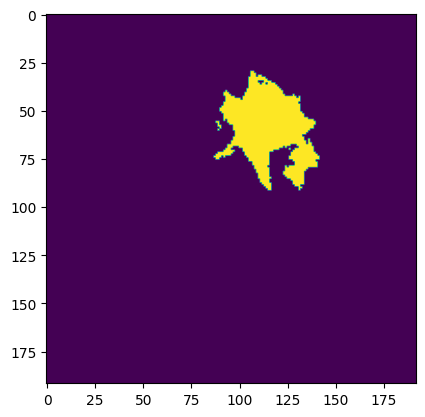

X_test 13


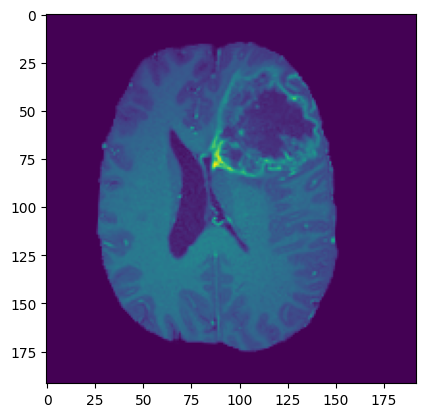

Predicted 13


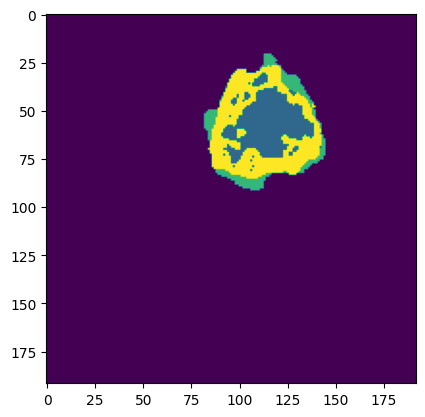

Actual 13


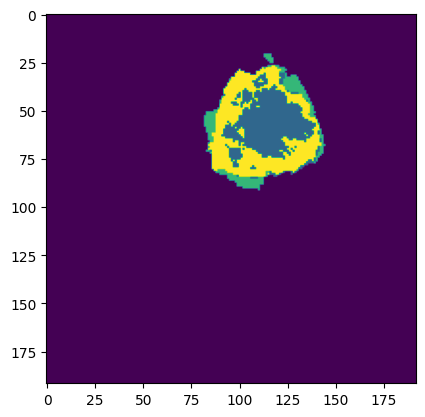

X_test 14


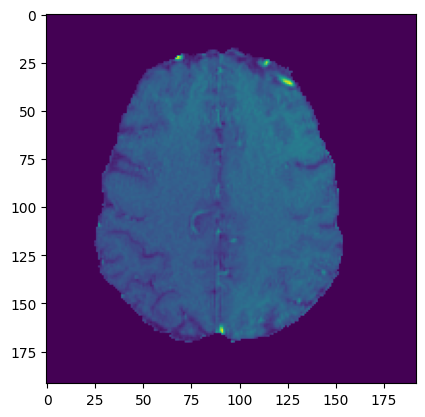

Predicted 14


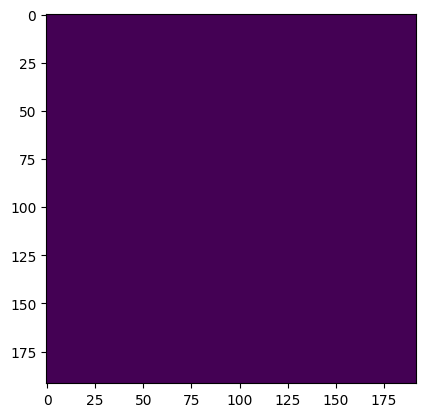

Actual 14


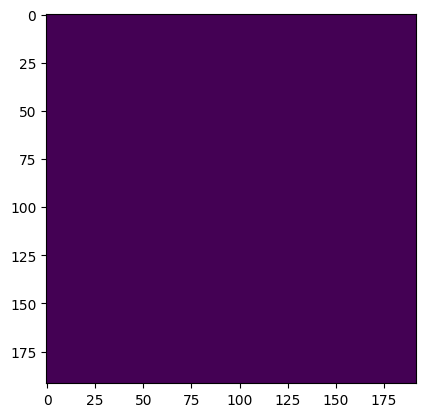

In [ ]:

for i in range(15):
  print('X_test '+ str(i))
  plt.imshow(X_test[i,:,:,2])
  plt.show()

  print('Predicted '+ str(i))
  plt.imshow(Y_pre[i,:,:,0])
  plt.show()

  print('Actual '+ str(i))
  plt.imshow(Y_test[i,:,:,0])
  plt.show()


# **Model Validation**

Due to memory constraints,couldn't validate the model on unseen data. This limitation arose from the restricted training capacity for handling large volumes of data and the high computational demands for extensive epochs. Consequently, we were constrained to validate solely on the validation dataset.








In [ ]:
Y_test_encod = to_categorical(Y_test)

In [ ]:

train_result = model.evaluate(X_train,Y_train,verbose=0)
test_result = model.evaluate(X_test,Y_test_encod,verbose=0)
val_result = model.evaluate(X_val,Y_val,verbose=0)

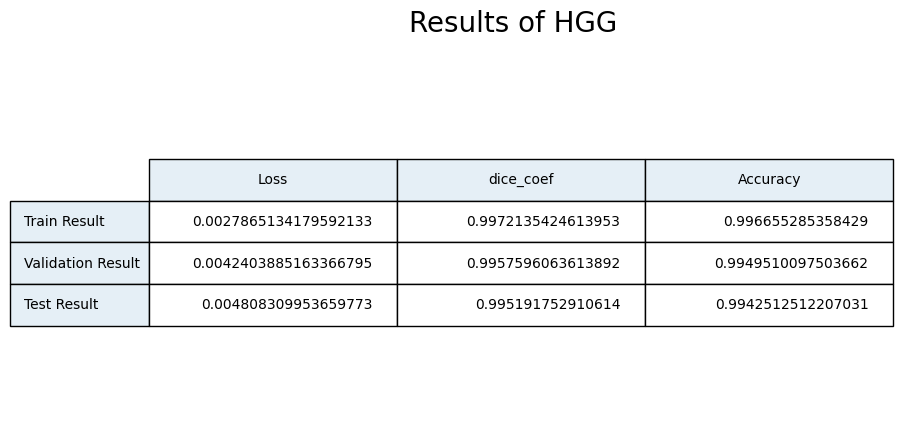

In [ ]:
cols = ['Loss', 'dice_coef', 'Accuracy']
rows = ['Train Result','Validation Result', 'Test Result']

cell_text = [train_result, val_result, test_result]

rcolors = plt.cm.BuPu(np.full(len(rows), 0.1))
ccolors = plt.cm.BuPu(np.full(len(cols), 0.1))

plt.figure(linewidth=4,
           facecolor= 'white'
          )

the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=rcolors,
                      colColours=ccolors,
                      colLabels=cols,
                      loc='center')

the_table.scale(1.5, 2.5)

plt.suptitle('Results of HGG', fontsize=20)

ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)


17/17 [==============================] - 1s 77ms/step


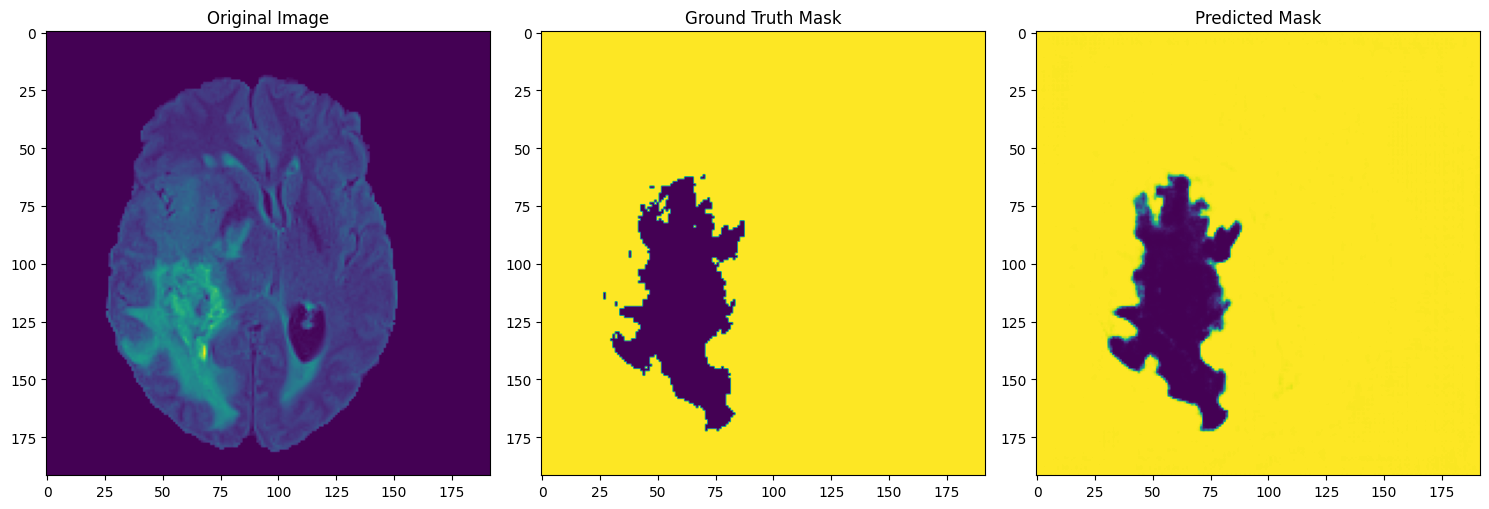

In [ ]:
# Predict segmentation masks for the validation dataset
predicted_masks = model.predict(X_val)

# Choose a specific index from the validation dataset
index = 2  # Index 2 corresponds to the third image (since indices start from 0)

# Plot the original image, ground truth mask, and predicted mask for the selected index
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(X_val[index, :, :, 0])
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(Y_val[index, :, :, 0])
plt.title('Ground Truth Mask')

plt.subplot(1, 3, 3)
plt.imshow(predicted_masks[index, :, :, 0])
plt.title('Predicted Mask')

plt.tight_layout()
plt.show()



In [ ]:

# Save the model
model.save('/content/drive/MyDrive/Colab Notebooks/vnet-model.h5', overwrite=True)

# **Result:**


*In conclusion, the performance metrics of model showcase its robustness and effectiveness in the segmentation/classification task.


*Specifically, the dice coefficient scores of 0.997, 0.996, and 0.995 for training, validation, and test sets respectively indicate a high degree of overlap between predicted and actual values, demonstrating the model's proficiency in accurately segmenting/classifying data.

*Additionally, with accuracy scores consistently above 99.5% across all datasets, our model exhibits strong predictive capabilities and generalization to unseen data.


 Furthermore, the low loss values, ranging from 0.0027 to 0.0048, signify that*the model effectively minimizes errors during training, ensuring reliable performance in real-world applications. These results underscore the efficacy and reliability of our model for the intended task.


